# Знакомство с данными

In [1]:
#import все нужные библиотеки
import pandas as pd
import xlrd
import numpy as np
import networkx as nx
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/limon4ik/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/limon4ik/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
data = pd.read_excel("ActualDataFeb2020.xlsx")

In [5]:
data_excel = xlrd.open_workbook('ActualDataFeb2020.xlsx')

In [3]:
data

,Дата - Время,Gpp,Tpp,Gp4,Go4,Tp4,T04,Gp5,Go5,Tp5,...,GpSN4,GoSN4,TpSN4,ToSn4,GpSN5,GoSN5,TpSN5,ToSN5,GoSN2,ToSN2
0,12.02.2020 - 00:00:00,309.94,107.65,1922,2042,109.35,63.53,1172,779,112.04,...,276.85,151.91,99.15,83.48,219.48,293.34,111.62,88,66.78,82
1,12.02.2020 - 00:10:00,315.52,107.42,1920,2042,109.47,63.55,1172,777,111.99,...,276.70,151.86,99.17,83.49,219.41,292.78,111.64,88,47.67,82
2,12.02.2020 - 00:20:00,308.43,107.32,1922,2044,109.50,63.59,1181,788,112.02,...,276.35,151.41,99.22,83.50,219.10,290.53,111.59,88,38.99,82
3,12.02.2020 - 00:30:00,320.57,107.29,1912,2039,109.39,63.61,1174,775,111.87,...,276.49,152.67,98.99,83.15,220.24,290.94,111.57,88,39.03,82
4,12.02.2020 - 00:40:00,320.70,107.32,1915,2043,109.37,63.62,1173,762,112.00,...,276.69,152.60,98.91,83.29,220.06,292.38,111.54,88,47.67,82
5,12.02.2020 - 00:50:00,319.28,107.27,1918,2031,109.23,63.64,1173,772,111.96,...,276.06,152.31,98.68,83.30,219.60,290.50,111.67,88,43.31,82
6,12.02.2020 - 01:00:00,322.76,107.32,1920,2028,108.81,63.66,1173,763,112.52,...,276.24,152.62,98.42,83.25,219.63,291.58,112.06,88,73.47,82
7,12.02.2020 - 01:10:00,316.44,107.26,1909,2023,109.15,63.69,1166,764,112.60,...,276.64,151.94,98.96,83.19,219.81,292.71,112.19,88,89.48,82
8,12.02.2020 - 01:20:00,322.76,107.37,1918,2034,109.30,63.71,1167,771,112.63,...,277.33,151.69,98.94,83.14,220.14,289.96,112.06,88,71.07,82
9,12.02.2020 - 01:30:00,320.68,107.49,1915,2019,108.93,63.74,1170,769,112.63,...,275.95,151.83,99.07,83.13,219.85,291.77,112.45,88,91.87,82


In [4]:
data.describe()

,Gpp,Tpp,Gp4,Go4,Tp4,T04,Gp5,Go5,Tp5,To5,...,GpSN4,GoSN4,TpSN4,ToSn4,GpSN5,GoSN5,TpSN5,ToSN5,GoSN2,ToSN2
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.00000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.00000,848.000000,848.000000,848.000000
mean,326.455790,105.910401,1906.387972,2012.884434,99.294340,60.83704,1165.704009,751.287736,100.552889,61.142818,...,280.034670,152.061651,93.542618,79.170106,223.616285,295.970189,100.23941,81.762972,68.370802,78.081368
std,7.212954,1.534362,27.767064,24.408194,6.963685,2.68539,15.603662,12.182487,7.044901,2.684685,...,1.387118,16.321431,3.174590,2.470361,1.617927,3.157424,6.97237,3.524473,23.184766,2.387340
min,302.730000,97.830000,1836.000000,1954.000000,86.330000,57.30000,1123.000000,721.000000,92.180000,57.640000,...,275.950000,0.000000,86.200000,74.060000,218.780000,280.260000,91.97000,78.000000,0.000000,73.000000
25%,320.730000,104.920000,1887.000000,1995.000000,93.112500,58.01000,1156.000000,742.000000,94.310000,58.340000,...,279.247500,152.980000,92.150000,77.760000,222.700000,294.087500,94.02000,79.000000,54.547500,77.000000
50%,326.195000,106.275000,1905.000000,2011.000000,97.610000,60.88000,1165.000000,751.500000,98.460000,61.190000,...,279.950000,153.665000,93.405000,78.825000,223.645000,296.015000,98.13000,80.000000,70.060000,78.000000
75%,332.052500,106.990000,1926.000000,2030.000000,107.085000,63.76000,1177.000000,761.000000,105.810000,64.090000,...,280.815000,154.190000,95.570000,80.882500,224.690000,298.112500,104.38750,84.000000,84.490000,80.000000
max,342.380000,109.510000,1968.000000,2073.000000,111.550000,65.18000,1201.000000,788.000000,113.070000,65.450000,...,283.960000,272.810000,99.430000,83.670000,228.050000,303.130000,112.69000,89.000000,125.480000,82.000000


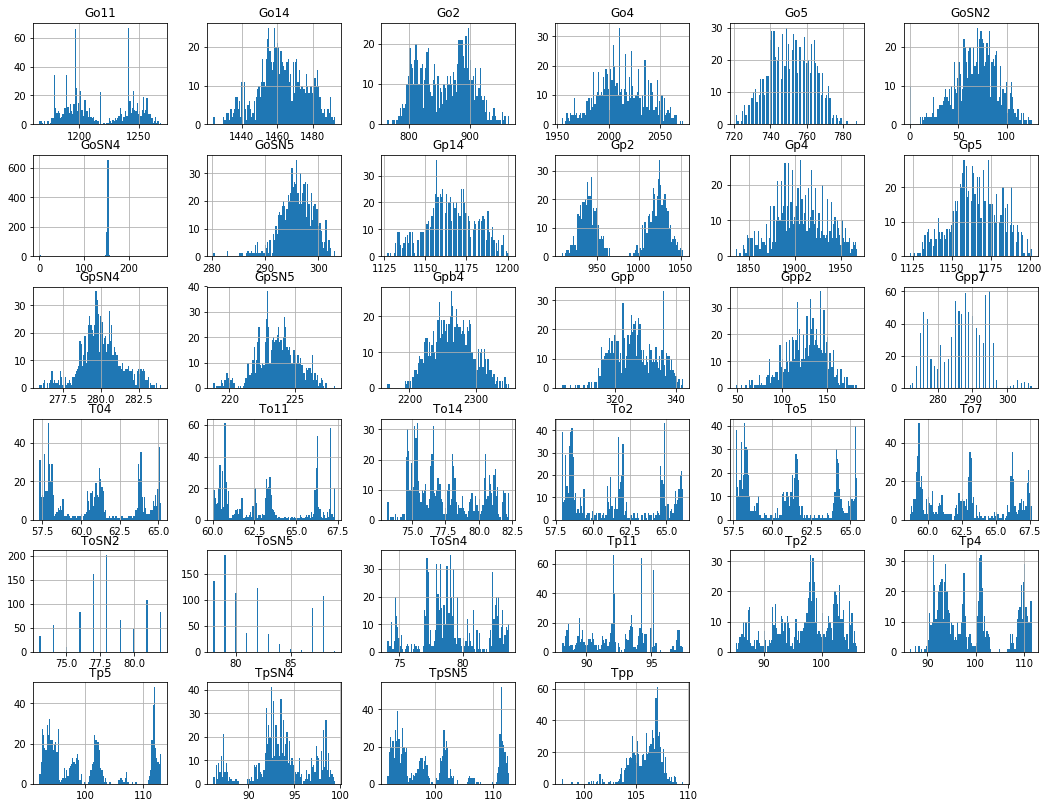

In [26]:
#посмотрим на распределения каждого датчика
data.hist(bins=100, figsize=(18,14))
plt.show()

Теперь рассмотрии графики, разделяя значения по времени. Для этого изменим значения даты на сравниваемые значения. 
Если формат 12.02.2020 - 00:00:00, то превратим его в 12022020000000

In [5]:
data['Дата - Время'] = data['Дата - Время'].apply(lambda x: x.replace('.', ''))   

In [6]:
data['Дата - Время'] = data['Дата - Время'].apply(lambda x: x.replace(':', ''))   

In [7]:
data['Дата - Время'] = data['Дата - Время'].apply(lambda x: x.replace('-', ''))   

In [8]:
data['Дата - Время'] = data['Дата - Время'].apply(lambda x: x.replace(' ', ''))   

Уберем год и месяц, потому что эти данные совпадают.




In [9]:
data['Дата - Время'] = data['Дата - Время'].apply(lambda x: x.replace('022020', ''))   

Возьмем, например, данные за утро с 00 до 7 утра.

In [27]:
data_morning = data[(data['Дата - Время'].apply(lambda x: x[2:]) >= '000000') & (data['Дата - Время'].apply(lambda x: x[2:]) < '070000')] 

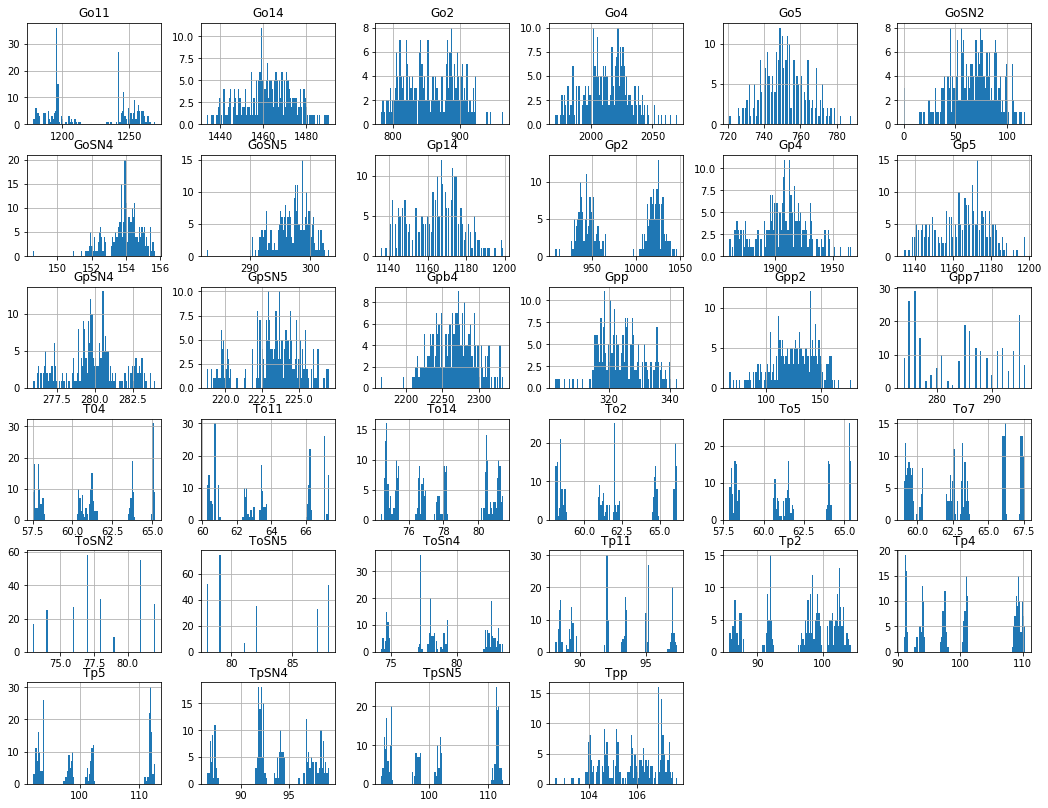

In [28]:
data_morning.hist(bins=100, figsize=(18,14))
plt.show()

Теперь возьмем данные с 7 утра до 14 дня.

In [29]:
data_day = data[(data['Дата - Время'].apply(lambda x: x[2:]) >= '070000') & (data['Дата - Время'].apply(lambda x: x[2:]) < '140000')]

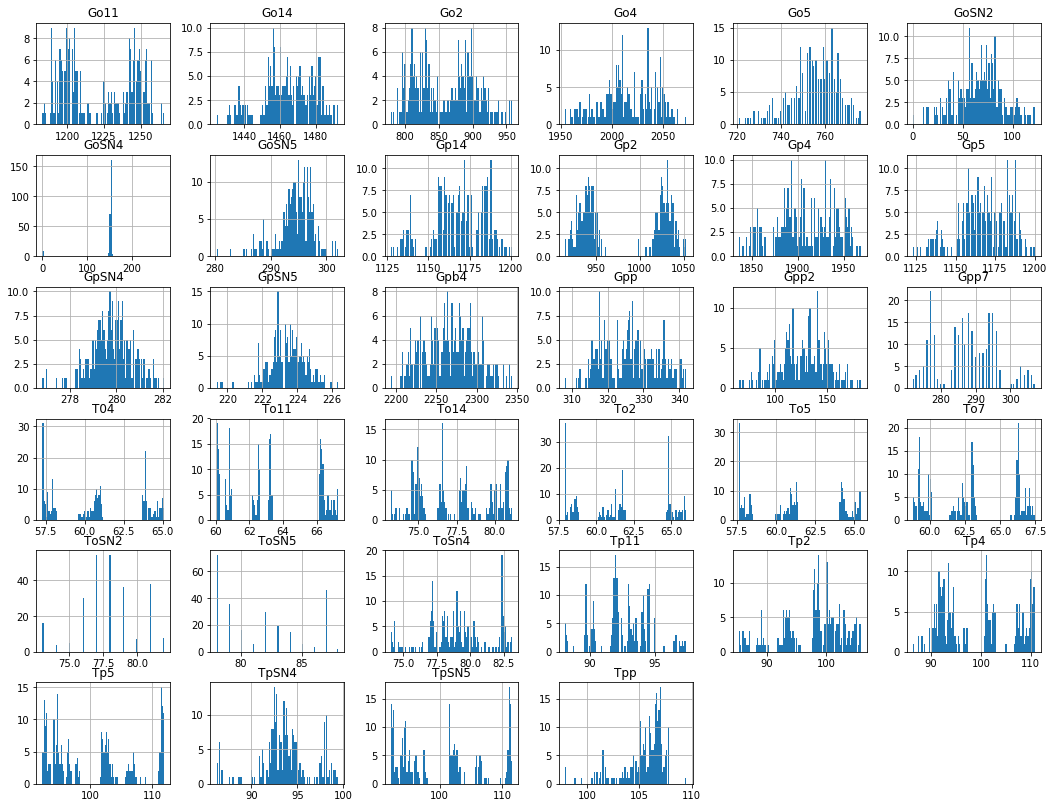

In [30]:
data_day.hist(bins=100, figsize=(18,14))
plt.show()

Теперь вечерние данные, т.е. с 14 дня до 20

In [31]:
data_evening = data[(data['Дата - Время'].apply(lambda x: x[2:]) >= '140000') & (data['Дата - Время'].apply(lambda x: x[2:]) < '200000')] 

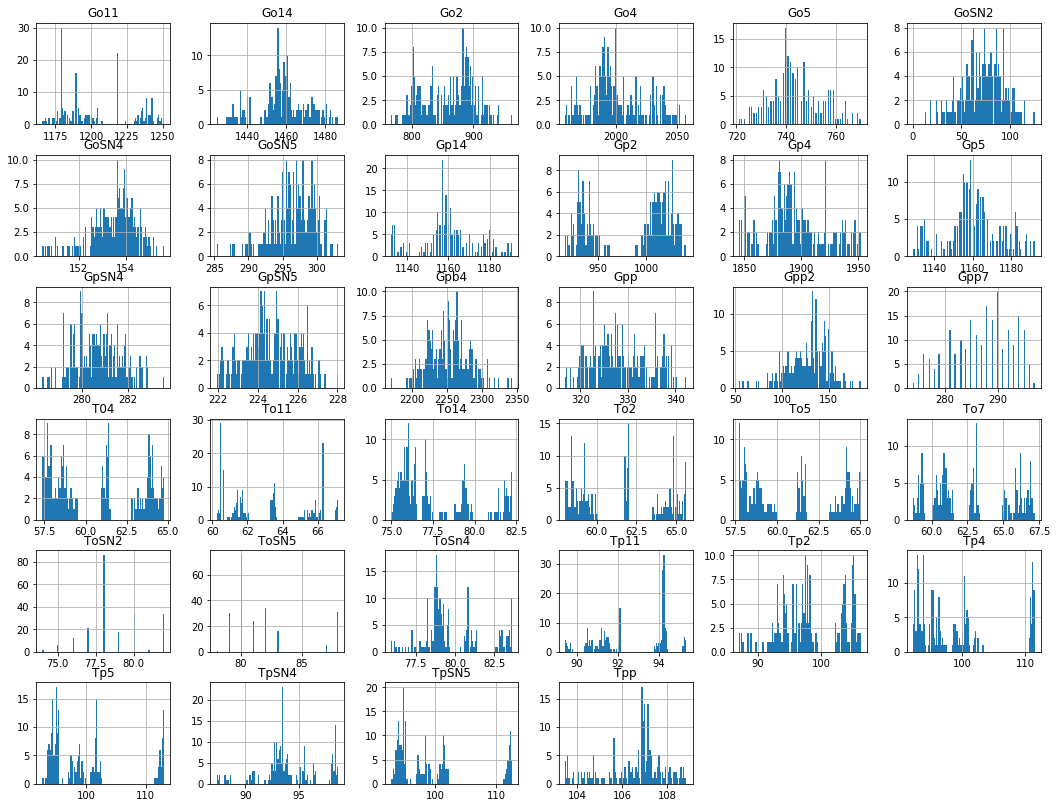

In [32]:
data_evening.hist(bins=100, figsize=(18,14))
plt.show()

Ну и остались данные ночные


In [33]:
data_nigth = data[(data['Дата - Время'].apply(lambda x: x[2:]) >= '200000') & (data['Дата - Время'].apply(lambda x: x[2:]) < '240000')] 

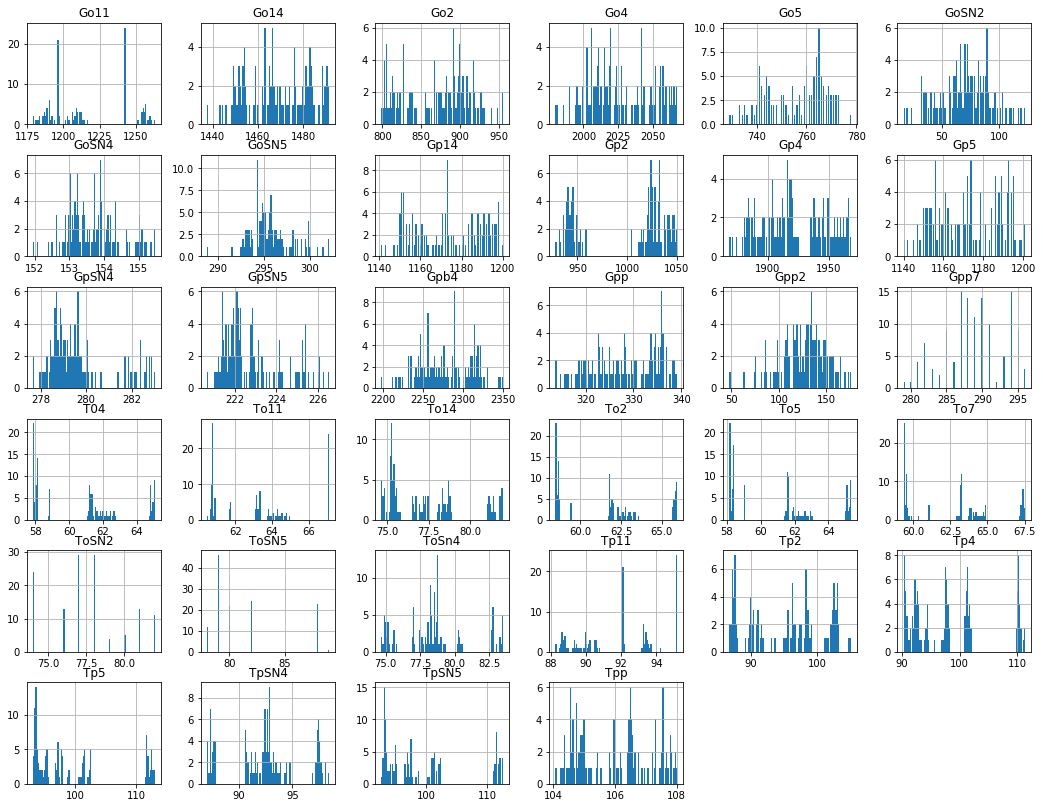

In [34]:
data_nigth.hist(bins=100, figsize=(18,14))
plt.show()

## Проверим гипотезу - каждый день распределения по воде похожи

In [10]:
data

,Дата - Время,Gpp,Tpp,Gp4,Go4,Tp4,T04,Gp5,Go5,Tp5,...,GpSN4,GoSN4,TpSN4,ToSn4,GpSN5,GoSN5,TpSN5,ToSN5,GoSN2,ToSN2
0,12000000,309.94,107.65,1922,2042,109.35,63.53,1172,779,112.04,...,276.85,151.91,99.15,83.48,219.48,293.34,111.62,88,66.78,82
1,12001000,315.52,107.42,1920,2042,109.47,63.55,1172,777,111.99,...,276.70,151.86,99.17,83.49,219.41,292.78,111.64,88,47.67,82
2,12002000,308.43,107.32,1922,2044,109.50,63.59,1181,788,112.02,...,276.35,151.41,99.22,83.50,219.10,290.53,111.59,88,38.99,82
3,12003000,320.57,107.29,1912,2039,109.39,63.61,1174,775,111.87,...,276.49,152.67,98.99,83.15,220.24,290.94,111.57,88,39.03,82
4,12004000,320.70,107.32,1915,2043,109.37,63.62,1173,762,112.00,...,276.69,152.60,98.91,83.29,220.06,292.38,111.54,88,47.67,82
5,12005000,319.28,107.27,1918,2031,109.23,63.64,1173,772,111.96,...,276.06,152.31,98.68,83.30,219.60,290.50,111.67,88,43.31,82
6,12010000,322.76,107.32,1920,2028,108.81,63.66,1173,763,112.52,...,276.24,152.62,98.42,83.25,219.63,291.58,112.06,88,73.47,82
7,12011000,316.44,107.26,1909,2023,109.15,63.69,1166,764,112.60,...,276.64,151.94,98.96,83.19,219.81,292.71,112.19,88,89.48,82
8,12012000,322.76,107.37,1918,2034,109.30,63.71,1167,771,112.63,...,277.33,151.69,98.94,83.14,220.14,289.96,112.06,88,71.07,82
9,12013000,320.68,107.49,1915,2019,108.93,63.74,1170,769,112.63,...,275.95,151.83,99.07,83.13,219.85,291.77,112.45,88,91.87,82


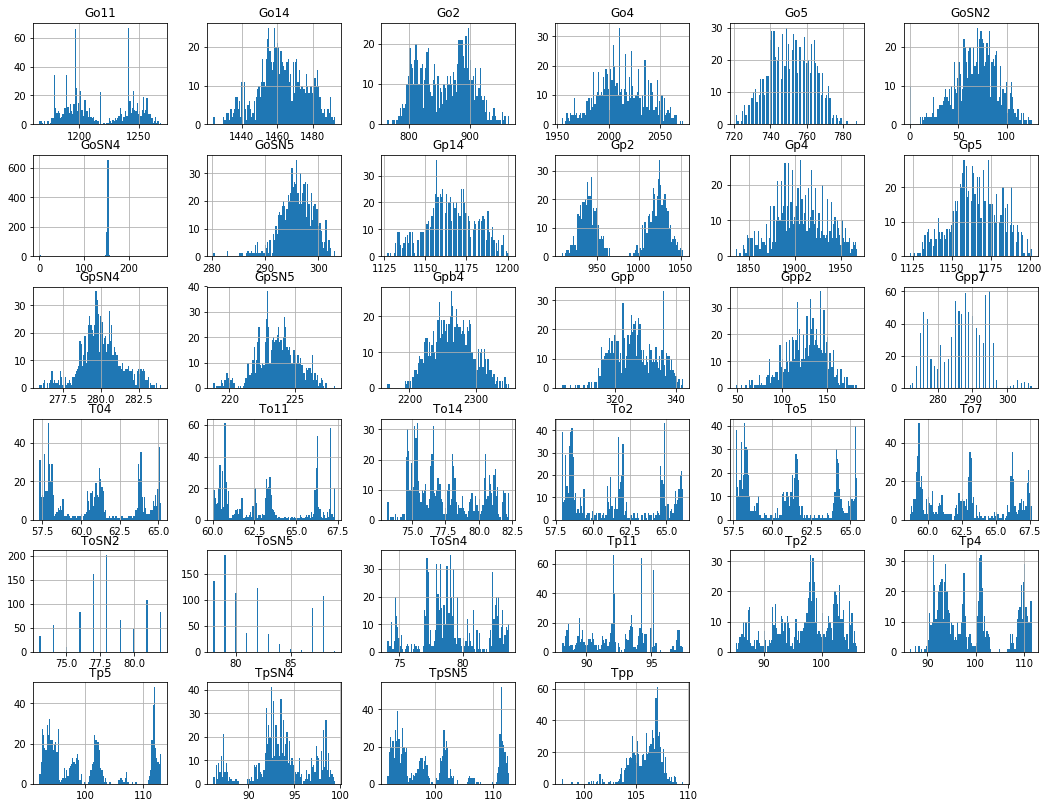

In [19]:
data.hist(bins=100, figsize=(18,14))
plt.show()

Посмотрим на 12 число, на 13 и так далее

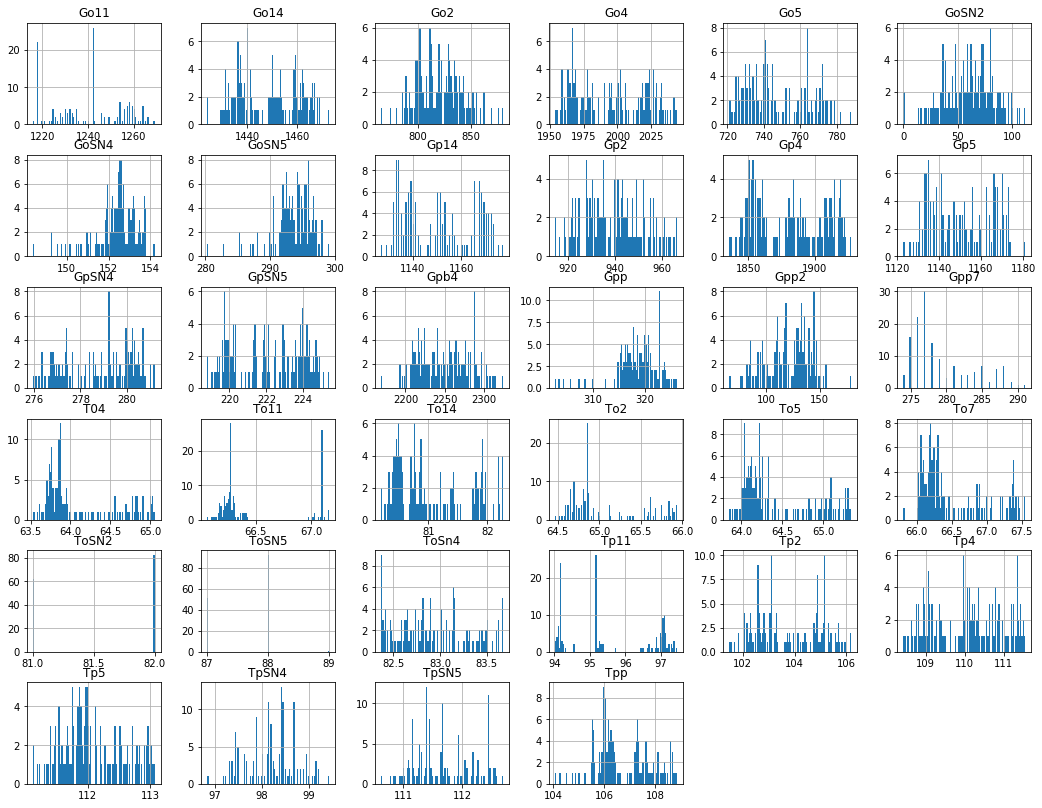

In [20]:
#за 12 число
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '12')].hist(bins=100, figsize=(18,14))
plt.show()

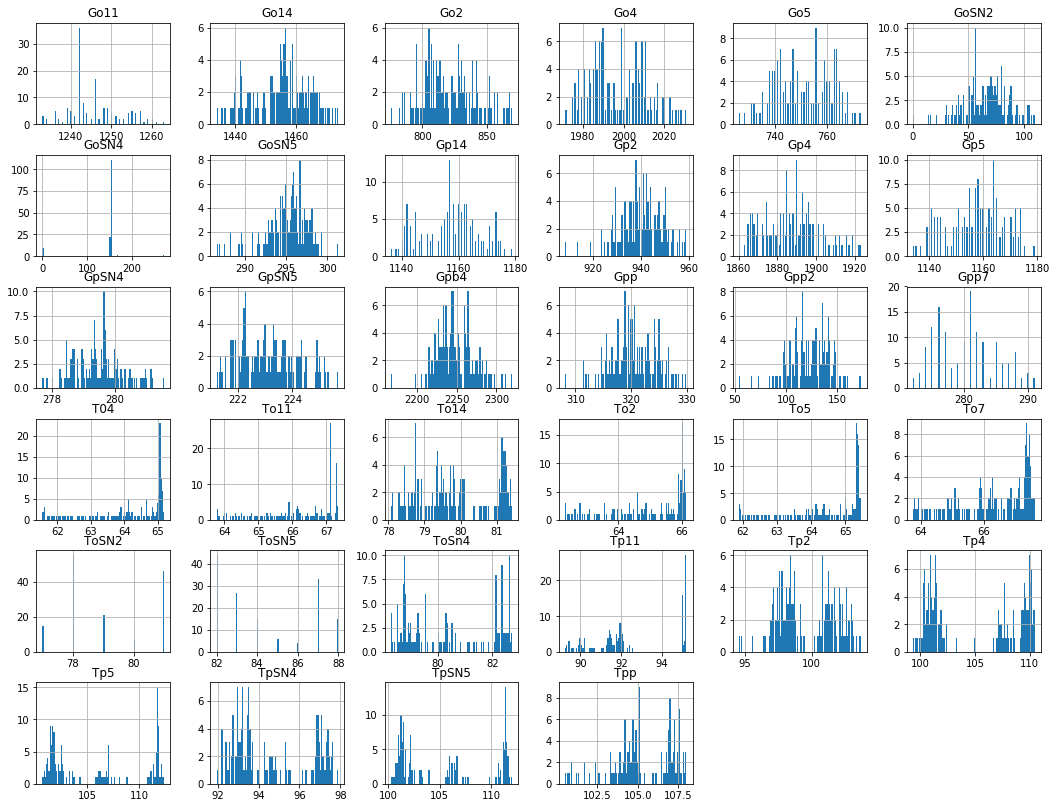

In [21]:
#за 13 число
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '13')].hist(bins=100, figsize=(18,14))
plt.show()

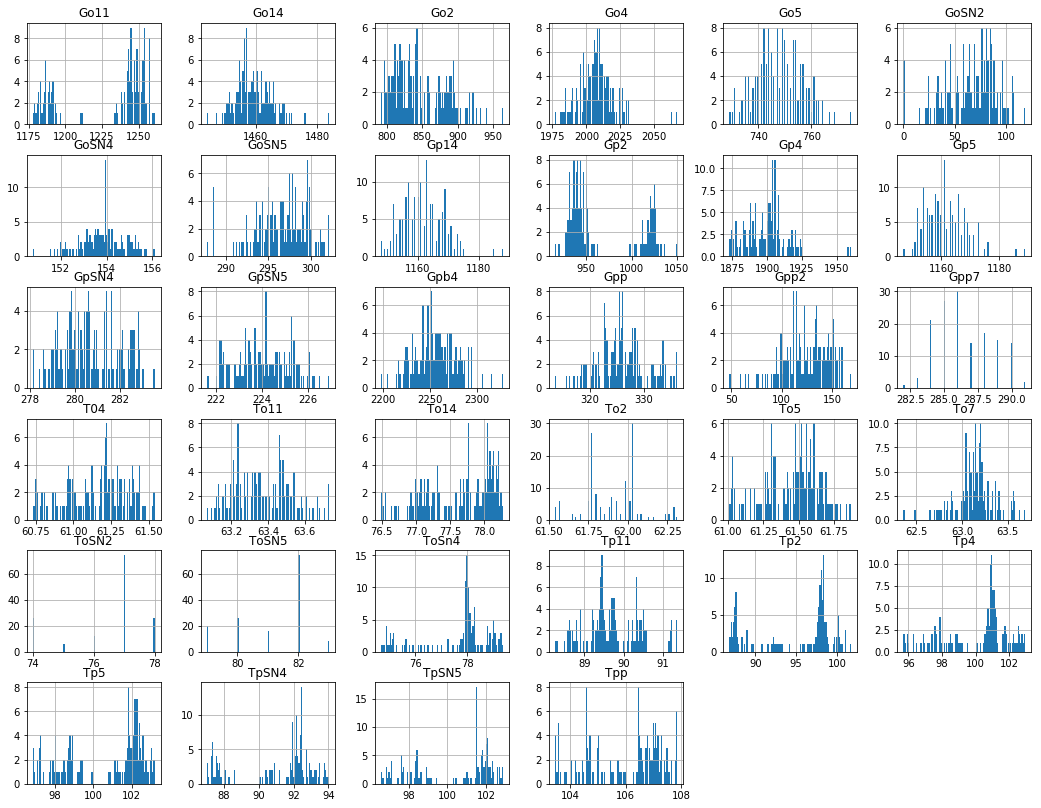

In [22]:
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '14')].hist(bins=100, figsize=(18,14))
plt.show()

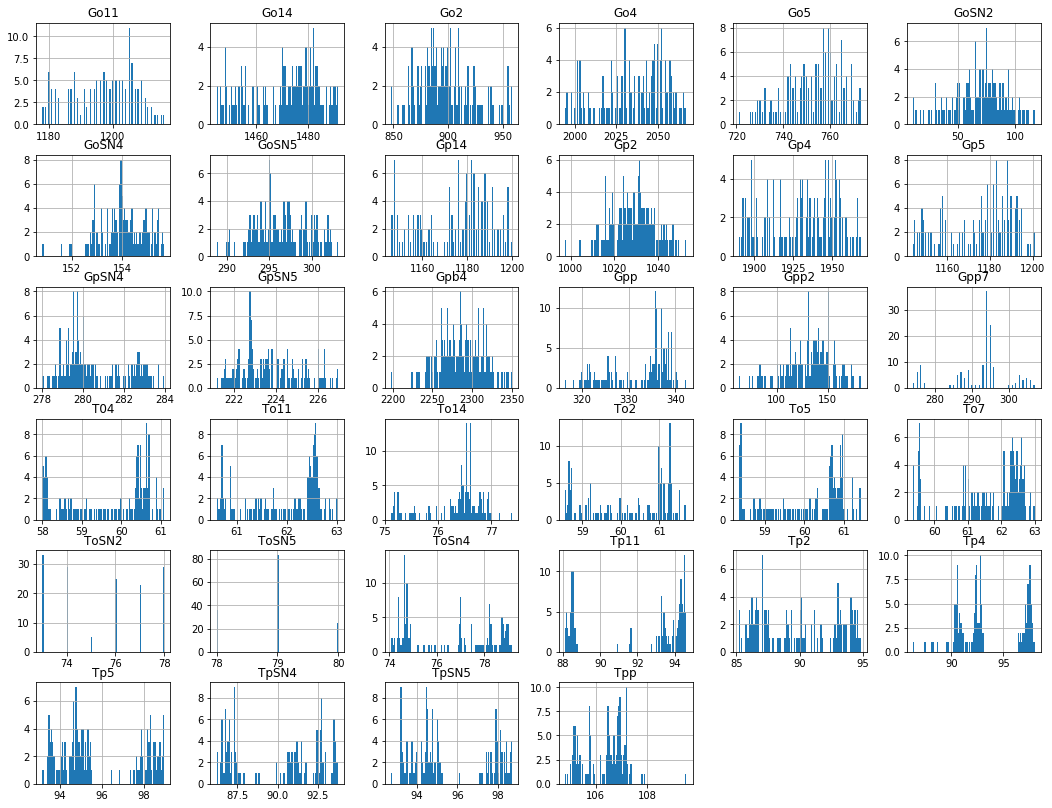

In [23]:
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '15')].hist(bins=100, figsize=(18,14))
plt.show()

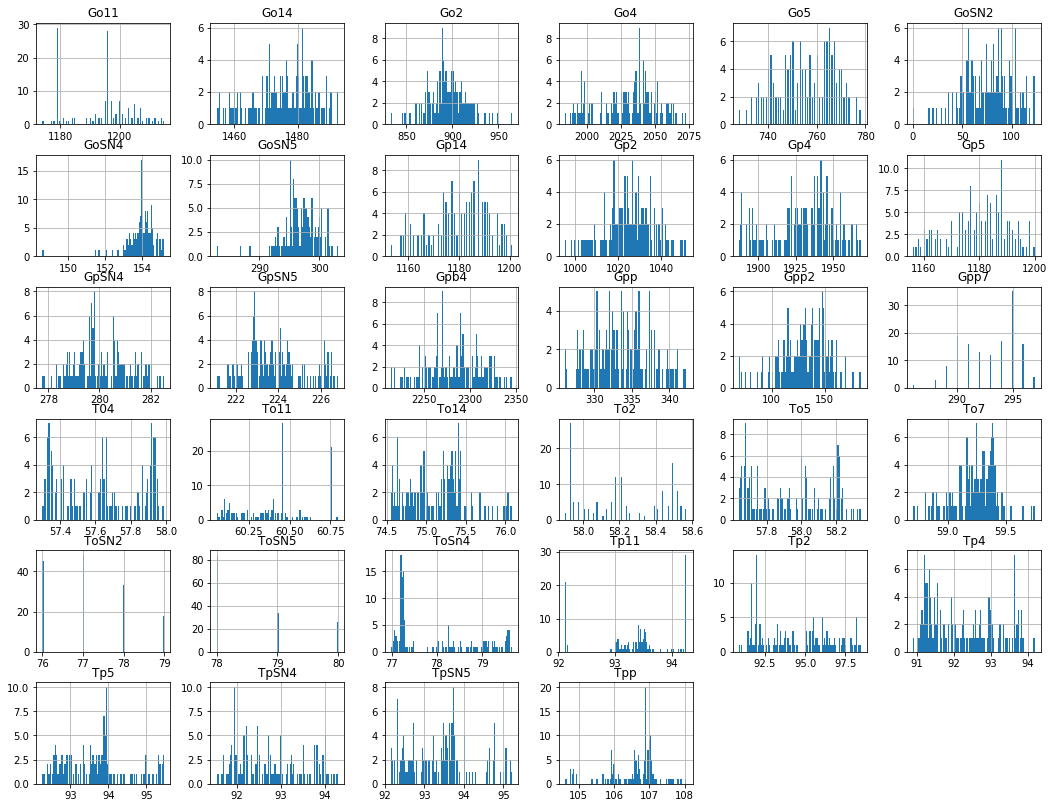

In [24]:
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '16')].hist(bins=100, figsize=(18,14))
plt.show()

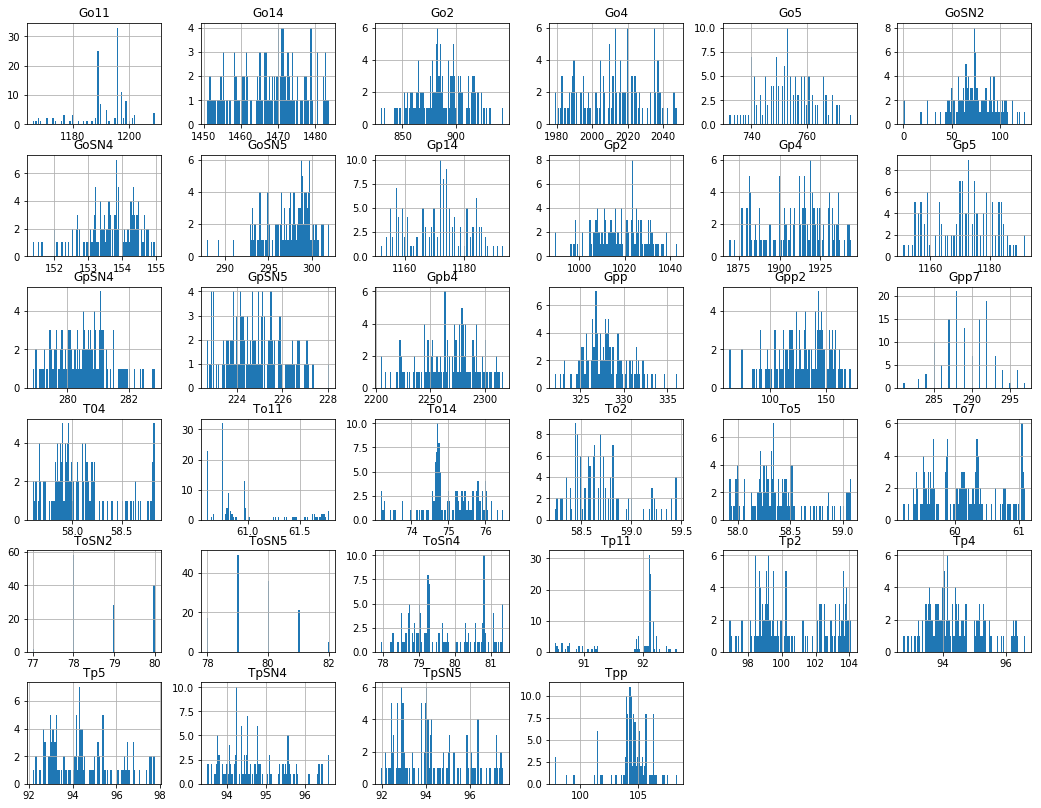

In [25]:
data[(data['Дата - Время'].apply(lambda x: x[0:2]) == '17')].hist(bins=100, figsize=(18,14))
plt.show()

## Данные по турбинам

In [15]:
TA9_data = pd.read_csv('TA9_data.csv')

In [16]:
TA11_data = pd.read_csv('TA11_data.csv')

In [18]:
TA9_data

,Unnamed: 0,calc_id,act_value,param_id,begin_dt,AKS_code,Name
0,0,452187,130.780170,727,2018-01-25 21:00:00,09T000PP0003,Давление острого пара ТА №09
1,1,452187,6.566280,734,2018-01-25 21:00:00,09T000PS0003,Давление пара отбора ТА №09
2,2,452187,544.083680,741,2018-01-25 21:00:00,09T000TP0003,Температура острого пара ТА №09
3,3,452187,225.981877,747,2018-01-25 21:00:00,09T000TS0003,Температура пара отбора ТА №09
4,4,452187,44.301000,1021,2018-01-25 21:00:00,09T000GE0003,Выработка э/э ТА №09
5,5,452187,233.694460,2809,2018-01-25 21:00:00,09T000TW0003,Температура питательной воды за ПВД ТА №09
6,6,452187,259.390060,6997,2018-01-25 21:00:00,09T010GW0003,Расход питательной воды за ПВД (по приборам) Т...
7,7,452187,330.397811,8917,2018-01-25 21:00:00,09T030GR0003,Расход острого пара (по приборам) ТА №09
8,8,452187,25.185338,9514,2018-01-25 21:00:00,09T120GQ3003,Отпуск тепла из отборов на регенерацию ПВД (по...
9,9,452187,45.378987,9515,2018-01-25 21:00:00,09T120DC0003,Расход пара отбора на регенерацию ПВД (по приб...


In [20]:
TA11_data

,Unnamed: 0,calc_id,act_value,param_id,begin_dt,AKS_code,Name
0,0,452191,0.000000,962,2018-01-26 01:00:00,11T000GE0903,Выработка э/э ТА №11 (Активная)
1,1,452191,0.000000,2561,2018-01-26 01:00:00,11T010DR0003,Расход пара П-отбора (по приборам) ТА №11
2,2,452191,0.000000,2644,2018-01-26 01:00:00,11T010QP0003,Отпуск тепла П-отбора (по приборам) ТА №11
3,3,452191,0.000000,2645,2018-01-26 01:00:00,11T010QT0003,Отпуск тепла Т-отбора (по приборам) ТА №11
4,4,452191,0.000000,4149,2018-01-26 01:00:00,11T030GR0003,Расход острого пара (по приборам) ТА №11
5,5,452191,0.000000,4150,2018-01-26 01:00:00,11T030GR6003,Расход острого пара (по приборам) [К-режим] ТА...
6,6,452191,0.000000,8075,2018-01-26 01:00:00,11T010GW0003,Расход питательной воды за ПВД (по приборам) Т...
7,7,452191,0.000000,9349,2018-01-26 01:00:00,11T430GR0003,Расход острого пара (по приборам) при вкл. ПВД...
8,8,452191,0.000000,9350,2018-01-26 01:00:00,11T330GR0003,Расход острого пара (по приборам) при откл. ПВ...
9,9,452191,0.000000,9498,2018-01-26 01:00:00,11T010KV0003,Вакуум в конденсаторе (по приборам) ТА №11


Данных много, но самих признаков 7 штук. Пока не понятно что с ними сделать. 